# EXPLORATORY DATA ANALYSIS OF NETFLIX TITLES

## INTRODUCTION


### Netflix has grown into one of the world’s largest content platforms, producing and hosting thousands of titles across different countries and genres.This project explores the Netflix Titles Dataset to uncover trends, patterns, and insights about the types of content available on the platform.

## AIM


### To analyze Netflix’s catalog to uncover trends in content production, genre popularity, and regional diversity, and to derive actionable insights that can help improve Netflix’s content strategy and audience engagement.

## DATASET 

### Source: [Netflix Titles Dataset on Kaggle](https://www.kaggle.com/datasets/shivamb/netflix-shows)
### Contains information about 8,800+ movies and TV shows, including title, director, cast, country, release year, rating, and description.

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [374]:
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## DATA CLEANING

In [377]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [379]:
df = pd.read_csv("netflix_titles.csv")
df['director'] = df['director'].fillna('Unknown')
df=df.drop("show_id",axis=1)

In [381]:
df.duplicated().sum()


0

In [188]:
df['cast'] = df.groupby('title')['cast'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

C:\Users\anuqu\AppData\Local\Temp\ipykernel_21736\2970300937.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['cast'] = df.groupby('title')['cast'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
C:\Users\anuqu\AppData\Local\Temp\ipykernel_21736\2970300937.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['cast'] = df.groupby('title')['cast'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


In [190]:
df.isnull().sum()

type              0
title             0
director          0
cast            825
country         831
date_added       10
release_year      0
rating            4
duration          3
listed_in         0
description       0
dtype: int64

In [192]:
cols = ['cast', 'country', 'date_added']
df[cols] = df[cols].fillna('Unknown')

In [194]:
df.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          4
duration        3
listed_in       0
description     0
dtype: int64

In [196]:
df = df.dropna()

In [198]:
df.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [200]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8800 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8800 non-null   object
 1   title         8800 non-null   object
 2   director      8800 non-null   object
 3   cast          8800 non-null   object
 4   country       8800 non-null   object
 5   date_added    8800 non-null   object
 6   release_year  8800 non-null   int64 
 7   rating        8800 non-null   object
 8   duration      8800 non-null   object
 9   listed_in     8800 non-null   object
 10  description   8800 non-null   object
dtypes: int64(1), object(10)
memory usage: 825.0+ KB


In [204]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')  

In [206]:
for col in ['director','cast','country','listed_in','rating','description']:
    if col in df.columns:
        df[col] = df[col].str.strip()

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8800 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8800 non-null   object        
 1   title         8800 non-null   object        
 2   director      8800 non-null   object        
 3   cast          8800 non-null   object        
 4   country       8800 non-null   object        
 5   date_added    8702 non-null   datetime64[ns]
 6   release_year  8800 non-null   int64         
 7   rating        8800 non-null   object        
 8   duration      8800 non-null   object        
 9   listed_in     8800 non-null   object        
 10  description   8800 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 825.0+ KB


In [210]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Total movies 

In [424]:
total_m = (df["type"]=="Movie").sum()
print(total_m)

6131


### Total TV Shows

In [426]:
total_s = (df["type"]=="TV Show").sum()
print(total_s)

2676


## ANALYSIS

#### 1. Content Age Analysis : What percentage of Netflix Movies and Web Series released in the last 10 years are targeted for 18+ audiences?



In [212]:
def is_adult(rating):
    if pd.isna(rating) or rating=='':
        return False
    rating = rating.upper()
    adult_terms = ['R','NC-17','TV-MA']
    return any(term in rating for term in adult_terms)
    
df['is_adult'] = df['rating'].apply(is_adult)


In [220]:
import datetime
current_year = datetime.datetime.now().year
last10 = list(range(current_year-9, current_year+1))

recent = df[df['release_year'].isin(last10)].copy()
summary = recent.groupby('type').apply(lambda g: pd.Series({
    'total': len(g),
    'adult_count': g['is_adult'].sum(),
    'pct_adult': 100 * g['is_adult'].sum() / max(len(g),1)
})).reset_index()

print(summary)

      type   total  adult_count  pct_adult
0    Movie  3617.0       1927.0  53.276196
1  TV Show  2037.0        997.0  48.944526


C:\Users\anuqu\AppData\Local\Temp\ipykernel_21736\3415811685.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary = recent.groupby('type').apply(lambda g: pd.Series({


#### INSIGHT : Over 53% of Movies and 48% of TV shows added since 2011 is rated 18+, showing Netflix’s strategic focus on mature global audiences.


#### 2. Platform Growth Trend : How has Netflix’s total content library (Movies vs TV Shows) evolved over the past 10 years?


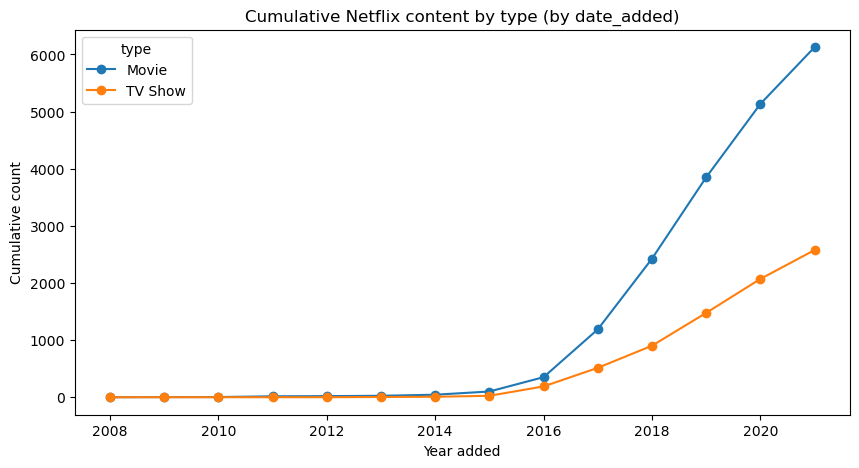

In [236]:
df['added_year'] = df['date_added'].dt.year
growth = df.dropna(subset=['added_year']).groupby(['added_year','type']).size().unstack(fill_value=0)

growth_cum = growth.cumsum()

import matplotlib.pyplot as plt
growth_cum.plot(kind='line', figsize=(10,5), marker='o')
plt.title('Cumulative Netflix content by type (by date_added)')
plt.xlabel('Year added')
plt.ylabel('Cumulative count')
plt.show()


#### INSIGHT : Netflix content has significantly risen over the past decade, both movies and TV shows, hence more variety.

#### 3. Successful Series Region : Which TV series are most likely to be renewed for multiple seasons by country?



In [255]:
tv_shows = df[df['type'] == 'TV Show'].copy()

tv_shows['num_seasons'] = tv_shows['duration'].str.extract('(\d+)').astype(int)

tv_shows['country'] = tv_shows['country'].fillna('Unknown')
tv_shows = tv_shows.assign(country=tv_shows['country'].str.split(',')).explode('country')
tv_shows['country'] = tv_shows['country'].str.strip()

country_success = (tv_shows.groupby('country').agg(avg_seasons=('num_seasons', 'mean'),num_shows=('title', 'count')).sort_values('avg_seasons', ascending=False))

country_success = country_success[country_success['num_shows'] > 3].round()

print("Top 10 Successful Series Regions (Most multi-season TV shows):")
print(country_success.head(10))

Top 10 Successful Series Regions (Most multi-season TV shows):
                avg_seasons  num_shows
country                               
Canada                  3.0        126
Ireland                 3.0         14
Denmark                 2.0         14
United States           2.0        938
Finland                 2.0          4
Saudi Arabia            2.0          4
Australia               2.0         65
United Kingdom          2.0        272
Norway                  2.0          9
Spain                   2.0         61


<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\anuqu\AppData\Local\Temp\ipykernel_21736\1507994456.py:3: SyntaxWarning: invalid escape sequence '\d'
  tv_shows['num_seasons'] = tv_shows['duration'].str.extract('(\d+)').astype(int)


#### INSIGHT : Analysis shows that the United States, United Kingdom, and Canada dominate in producing multi-season Netflix series, with average season counts of around 2–3.While the U.S. leads with the highest number of shows, countries like Canada and Ireland stand out for maintaining a higher average season count, suggesting stronger viewer engagement or higher renewal potential. This indicates that English-speaking regions contribute most to Netflix’s long-term, high-retention content, while European regions like Denmark, Spain, and Norway also demonstrate emerging consistency in multi-season storytelling.

### Netflix can prioritize regional investments in markets that show higher renewal rates (e.g., Canada, UK).

### Countries with smaller output but high average seasons (like Ireland or Denmark) may represent high viewer loyalty per title, making them good candidates for future co-productions.

### This insight helps Netflix decide where to expand or co-produce series that are more likely to sustain multi-season success.

#### 4. Content Acquisition Efficiency : What is the average time taken by Netflix to add a title after its original release?


In [292]:
df['added_year'] = df['date_added'].dt.year

df['acquisition_delay'] = df['added_year'] - df['release_year']

df = df.dropna(subset=['acquisition_delay'])
df = df[df['acquisition_delay'] >= 0]

overall_avg_delay = df['acquisition_delay'].mean().round(1)

print(f"Average time for Netflix to add a title: {overall_avg_delay} years")

Average time for Netflix to add a title: 4.9 years


### INSIGHT : On average, Netflix adds titles approximately 4.9 years after their original release, suggesting that most content arrives on the platform well after its initial debut. This delay may reflect licensing negotiations, regional exclusivity periods, or Netflix’s strategy of acquiring proven hits after their initial performance in theaters or on other platforms.

### This calls for a strategic focus on licensing established titles rather than immediate post-release streaming.

#### 5. Content Addition Lag Analysis : Has the lag between a title’s original release and its addition to Netflix decreased over time? Which countries exhibit the highest delays?

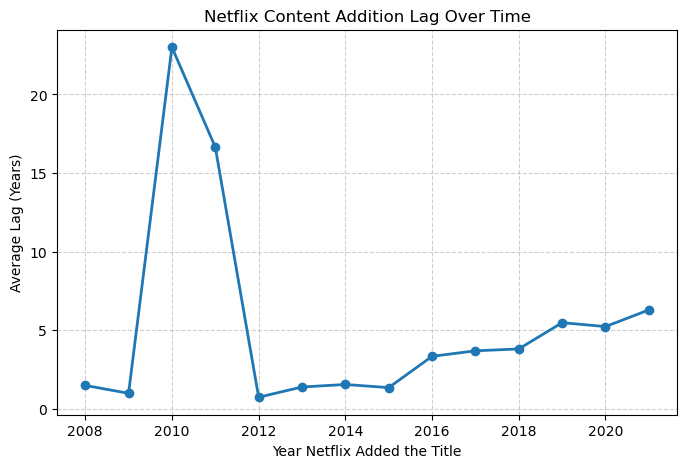

Trend: In 2008, average lag was 1.5 years.
By 2021, it changed to 6.3 years.



In [294]:
yearly_lag = (
    df.groupby('added_year')['acquisition_delay']
    .mean()
    .round(2)
    .reset_index()
    .rename(columns={'acquisition_delay': 'avg_addition_lag'})
)

plt.figure(figsize=(8,5))
plt.plot(yearly_lag['added_year'], yearly_lag['avg_addition_lag'], marker='o', linewidth=2)
plt.title("Netflix Content Addition Lag Over Time")
plt.xlabel("Year Netflix Added the Title")
plt.ylabel("Average Lag (Years)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

latest_year = yearly_lag.iloc[-1]
oldest_year = yearly_lag.iloc[0]
print(f"Trend: In {int(oldest_year['added_year'])}, average lag was {oldest_year['avg_addition_lag']} years.")
print(f"By {int(latest_year['added_year'])}, it changed to {latest_year['avg_addition_lag']} years.\n")



Top 10 Countries with Highest Content acquisition_delay:
           country  acquisition_delay
8        Hong Kong               13.8
9           Poland               10.9
10           Egypt               10.8
11         Lebanon               10.2
16           India                6.7
18     New Zealand                6.0
19        Malaysia                5.8
20   United States                5.7
21           Italy                5.6
22  Czech Republic                5.4


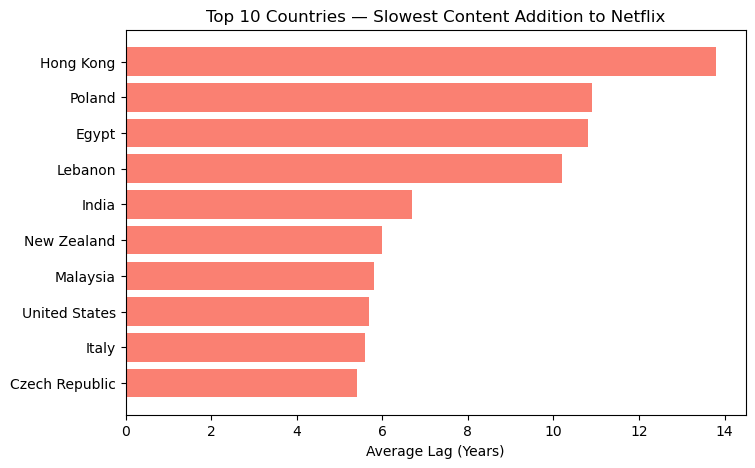

In [298]:
df = df.assign(country=df['country'].str.split(',')).explode('country')
df['country'] = df['country'].str.strip()

country_lag = (
    df.groupby('country')['acquisition_delay']
    .mean()
    .round(1)
    .sort_values(ascending=False)
    .reset_index()
)

country_counts = df['country'].value_counts()
valid_countries = country_counts[country_counts > 10].index
country_lag = country_lag[country_lag['country'].isin(valid_countries)]

top_slowest = country_lag.head(10)
print("Top 10 Countries with Highest Content acquisition_delay:")
print(top_slowest)

plt.figure(figsize=(8,5))
plt.barh(top_slowest['country'], top_slowest['acquisition_delay'], color='salmon')
plt.xlabel("Average Lag (Years)")
plt.title("Top 10 Countries — Slowest Content Addition to Netflix")
plt.gca().invert_yaxis()
plt.show()

### INSIGHT : The lag between a title’s release and its addition to Netflix has increased from 1.5 years in 2008 to 6.3 years in 2021, indicating slower content acquisition over time. Countries with the highest delays include those with stricter licensing and regional rights such as Hong Kong, Poland, Egypt and even India.

### Netflix could optimize its licensing strategy by balancing cost, risk, and speed of acquisition—especially in high-delay regions—to strengthen market position and enhance viewer satisfaction.

#### 6. Top Talent Influence : Who are the top 10 actors and directors by frequency of appearances in Netflix titles, and how might this influence content popularity?


In [319]:
directors = (
    df['director']
    .str.split(',', expand=True)
    .stack()                      
    .str.strip()                
    .value_counts()              
    .head(10)                     
)
actors = (
    df['cast']
    .str.split(',', expand=True)
    .stack()
    .str.strip()
    .value_counts()
    .head(10)
)
directors = directors[directors.index != "Unknown"]

if not directors.empty:
    print("Top 10 Directors on Netflix:\n", directors)

print()
actors = actors[actors.index != "Unknown"]

if not actors.empty:
    print("Top 10 Actors on Netflix:\n", actors)

Top 10 Directors on Netflix:
 Rajiv Chilaka       22
Jan Suter           21
Raúl Campos         19
Martin Scorsese     18
Steven Spielberg    18
Youssef Chahine     17
Suhas Kadav         16
Marcus Raboy        16
Jay Karas           15
Name: count, dtype: int64

Top 10 Actors on Netflix:
 Anupam Kher           46
David Attenborough    45
John Cleese           40
Tara Strong           39
Shah Rukh Khan        38
Vincent Tong          37
Andrea Libman         36
Liam Neeson           36
Alfred Molina         35
Name: count, dtype: int64


### INSIGHT : Netflix’s catalog leverages high-frequency directors and actors to maintain content popularity and retention.

### Collaborating with proven talent helps in producing multi-season series, increasing engagement, and enhancing global appeal.

### Platforms can strategically highlight content featuring top talent in recommendations, marketing, and regional programming to maximize viewership.

#### 7. Successful Series by Genre and Region : Genres of TV series are most likely to be renewed for multiple seasons, and how does this vary by country? 


In [449]:
tv_shows = df[df['type'] == 'TV Show'].copy()
tv_shows['country'] = tv_shows['country'].fillna('Unknown')
tv_shows['listed_in'] = tv_shows['listed_in'].fillna('Unknown')
tv_shows['duration'] = tv_shows['duration'].fillna('1 Season')  # assume 1 season if missing

def extract_seasons(duration):
    if 'Season' in duration:
        return int(duration.split(' ')[0])
    else:
        return 1

tv_shows['num_seasons'] = tv_shows['duration'].apply(extract_seasons)

tv_shows_expanded = tv_shows.assign(genre=tv_shows['listed_in'].str.split(', ')).explode('genre')

genre_country_stats = tv_shows_expanded.groupby(['country', 'genre']).agg(
    avg_seasons=('num_seasons', 'mean'),
    num_shows=('title', 'count')
).reset_index()

genre_country_stats = genre_country_stats.sort_values(['country', 'avg_seasons'], ascending=[True, False]).round()

print(genre_country_stats.head(20))

                             country                      genre  avg_seasons  \
0                      , South Korea     International TV Shows          1.0   
1                      , South Korea                  TV Dramas          1.0   
8                          Argentina          Romantic TV Shows          2.0   
13                         Argentina              Teen TV Shows          2.0   
6                          Argentina                   Kids' TV          2.0   
10                         Argentina                TV Comedies          2.0   
9                          Argentina  Spanish-Language TV Shows          1.0   
5                          Argentina     International TV Shows          1.0   
3                          Argentina             Crime TV Shows          1.0   
2                          Argentina          Classic & Cult TV          1.0   
4                          Argentina                 Docuseries          1.0   
7                          Argentina    

### INSIGHT :-
### Regional trends:

### 1.Argentina: Teen, Kids, Romantic, and Comedy shows average ~2 seasons; other genres mostly 1 season.

### 2. Australia: Teen TV Shows stand out with 4 seasons.

### 3. South Korea: International and Drama series.

### Business takeaway: Netflix should focus on teen, kids, romantic, and comedy genres for multi-season content in markets where they perform well, while niche or international shows may remain single-season releases.

In [461]:
tv_shows = df[df['type'] == 'TV Show'].copy()
tv_shows['listed_in'] = tv_shows['listed_in'].fillna('Unknown')
tv_shows['duration'] = tv_shows['duration'].fillna('1 Season')

def extract_seasons(duration):
    if 'Season' in duration:
        return int(duration.split(' ')[0])
    else:
        return 1

tv_shows['num_seasons'] = tv_shows['duration'].apply(extract_seasons)

tv_shows_expanded = tv_shows.assign(genre=tv_shows['listed_in'].str.split(', ')).explode('genre')

tv_shows_expanded = tv_shows_expanded.drop_duplicates(subset=['title', 'genre'])

genre_stats = tv_shows_expanded.groupby('genre').agg(
    avg_seasons=('num_seasons', 'mean'),
    num_shows=('title', 'count')
).reset_index()

genre_stats['avg_seasons'] = genre_stats['avg_seasons'].round(1)

top10_genres = genre_stats.sort_values('avg_seasons', ascending=False).head(10)

print(top10_genres)


                    genre  avg_seasons  num_shows
2       Classic & Cult TV          5.7         28
18    TV Sci-Fi & Fantasy          2.7         84
13  TV Action & Adventure          2.4        168
21          Teen TV Shows          2.2         69
17           TV Mysteries          2.2         98
14            TV Comedies          2.2        581
20           TV Thrillers          2.1         57
16              TV Horror          2.1         75
6                Kids' TV          2.0        451
15              TV Dramas          1.9        763


### INSIGHT:

### 1. Cult & niche genres (Classic & Cult, Sci-Fi & Fantasy) have higher average seasons, showing that loyal audiences drive longer series.

### 2. High-volume genres (Comedies, Dramas, Kids' TV) have moderate to low average seasons, meaning many shows are produced but only a few get multi-season renewals.

### 3. Teen, Mystery, Thriller, and Horror sit in the middle — steady but niche audiences maintain enough interest for multiple seasons.

#### 8. Themes and Emotional Tone Analysis : How have the themes and emotional tones of Netflix content descriptions evolved over time?

In [344]:
pip install textblob


In [ ]:
df['year_added'] = df['date_added'].dt.year
df = df.dropna(subset=['description', 'year_added'])

In [346]:
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment'] = df['description'].apply(get_sentiment)

sentiment_trend = df.groupby('year_added')['sentiment'].mean().round(3)
print(sentiment_trend.tail(10))


year_added
2012    0.188
2013    0.093
2014    0.196
2015    0.033
2016    0.068
2017    0.051
2018    0.052
2019    0.066
2020    0.047
2021    0.058
Name: sentiment, dtype: float64


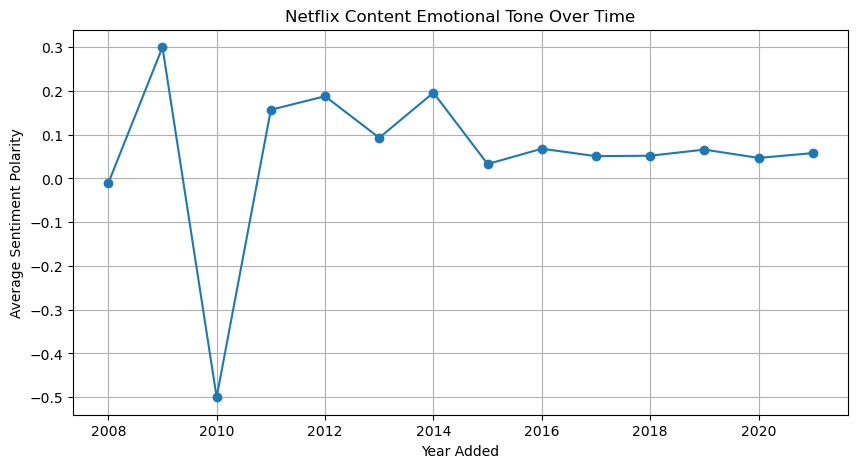

In [333]:
import matplotlib.pyplot as plt

sentiment_trend.plot(figsize=(10,5), marker='o', title="Netflix Content Emotional Tone Over Time")
plt.ylabel("Average Sentiment Polarity")
plt.xlabel("Year Added")
plt.grid(True)
plt.show()


### INSIGHT : Netflix’s content tone has changed over time. It was more positive between 2009 and 2014, but became more neutral after 2015. This shows a move toward more balanced and varied themes in its shows and movies.

### Audience Engagement: By offering a wider emotional spectrum, Netflix can appeal to different viewer segments, increasing engagement and reducing content fatigue.

### Content Strategy: This tonal shift aligns with Netflix’s strategy to diversify genres, including dramas, thrillers, and documentaries, strengthening its competitive edge.

### Marketing Opportunities: Neutral or varied tones allow for targeting niche audiences and creating personalized recommendations, enhancing retention and watch-time.

## CONCLUSION

##### Netflix’s library has grown significantly over the past decade, with over 53% of movies and 48% of TV shows rated 18+, reflecting a focus on mature audiences. Multi-season series are most common in the U.S., U.K., and Canada, with English-speaking regions showing strong viewer retention, while emerging European markets also demonstrate consistency. 

##### Genre insights show that Classic & Cult, Sci-Fi & Fantasy, and Teen shows have the highest average seasons, while high-volume genres like Comedies, Dramas, and Kids’ TV often have moderate renewals. Regional trends indicate that Argentina and Australia favor Teen and Comedy series, while niche and international genres tend to be single-season.

##### Netflix adds titles on average 4.9 years after release, with delays increasing over time in countries with strict licensing. Content tone has evolved from positive (2009–2014) to more neutral after 2015, showing diverse storytelling strategies.

##### Takeaway: Focus on multi-season, high-retention genres in key regions, while managing licensing delays and selectively renewing high-volume genres for sustainable growth and engagement.